In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
value_1=np.array([10,20,30,40,50,60,70,80,90])
value_2=np.array([15,25,35,45,55,65,75,85,95])

In [8]:
#making data supervised series
output =value_1+value_2
output

array([[ 25],
       [ 45],
       [ 65],
       [ 85],
       [105],
       [125],
       [145],
       [165],
       [185]])

In [9]:
value_1=value_1.reshape(len(value_1),1)
value_2=value_2.reshape(len(value_2),1)
output=output.reshape(len(output),1)

In [10]:
data=np.hstack((value_1,value_2,output))
data

array([[ 10,  15,  25],
       [ 20,  25,  45],
       [ 30,  35,  65],
       [ 40,  45,  85],
       [ 50,  55, 105],
       [ 60,  65, 125],
       [ 70,  75, 145],
       [ 80,  85, 165],
       [ 90,  95, 185]])

In [11]:
#x
#y
def timeseriesTransform(n_steps,data):
  x=[]
  y=[]
  for i in range(n_steps,len(data)+1):
    x.append(data[i-n_steps:i,:-1])
    y.append(data[i-1,-1])
  return np.array(x),np.array(y)

In [12]:
n_steps=3
x,y=timeseriesTransform(n_steps,data)

In [13]:
x

array([[[10, 15],
        [20, 25],
        [30, 35]],

       [[20, 25],
        [30, 35],
        [40, 45]],

       [[30, 35],
        [40, 45],
        [50, 55]],

       [[40, 45],
        [50, 55],
        [60, 65]],

       [[50, 55],
        [60, 65],
        [70, 75]],

       [[60, 65],
        [70, 75],
        [80, 85]],

       [[70, 75],
        [80, 85],
        [90, 95]]])

In [14]:
y

array([ 65,  85, 105, 125, 145, 165, 185])

In [15]:
x.shape

(7, 3, 2)

In [16]:
y.shape

(7,)

In [18]:
from keras.layers import Dense,LSTM
from keras.models import Sequential
model=Sequential()
model.add(LSTM(50,activation='relu',input_shape=(n_steps,x.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [19]:
history=model.fit(x,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 23s 23s/step - loss: 16229.5107
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 16100.7998
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 15974.1982
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 15851.5303
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 15734.0391
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 15622.0449
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 15515.1377
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 15412.4219
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 15312.9170
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 15215.5723
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - loss: 15119.4688
Epoch 12/100
1/1 [==============================] - 0s 14ms/step - loss: 15023.6514
Epoch 13/1

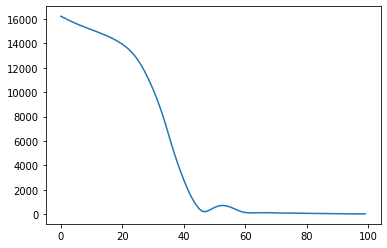

In [21]:
plt.plot(history.history["loss"])

In [23]:
#Generating Data For Testing
xtest=np.array([[80,85],[90,95],[100,105]])
xtest=xtest.reshape((1,3,2))

In [25]:
ypred=model.predict(xtest)
ypred

array([[205.99873]], dtype=float32)

**GRU (Gated Recurrent Unit )**

In [26]:
from keras.layers import Dense,GRU
from keras.models import Sequential
model=Sequential()
model.add(GRU(50,activation='relu',input_shape=(n_steps,x.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [27]:
history=model.fit(x,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 17560.4082
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 17433.7090
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 17302.2988
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 17165.6484
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 17023.6211
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 16876.5703
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 16725.2773
Epoch 8/100
1/1 [==============================] - 0s 17ms/step - loss: 16570.5840
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 16413.4746
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 16255.3652
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - loss: 16094.7646
Epoch 12/100
1/1 [==============================] - 0s 8ms/step - loss: 15931.0400
Epoch 13/

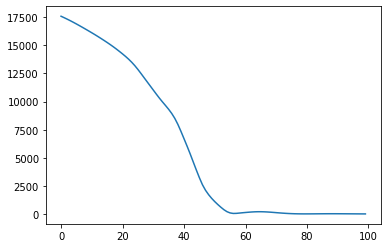

In [28]:
plt.plot(history.history["loss"])

In [29]:
#Generating Data For Testing
xtest=np.array([[80,85],[90,95],[100,105]])
xtest=xtest.reshape((1,3,2))

In [30]:
ypred=model.predict(xtest)
ypred

array([[211.63928]], dtype=float32)